<a href="https://colab.research.google.com/github/CassioRocha/Dadoscd/blob/master/Projeto_FINAL_AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  #                       PROJETO DE AM 2020.1  


> **Disciplina**: Aprendizagem de Máquina

> **Professores**: Evandro Costa e Xu Yang  

> **Dupla**: Cássio Rocha, Flávio Vasconcelos 


Colab url: https://colab.research.google.com/drive/1IEgNhVSTiZjof1T3KYB9vl3zsBBi4Mpl#scrollTo=oFIJHBWci0ym&uniqifier=1








# 1. Realizar uma Análise Exploratória
  banco de dados escolhido foi sobre **doença do rim crônico** , foi observado que existiam muitos dados faltantes. 
  * Os dados não estão balanceados

Usamos 24 + classe = 25 (11 numéricos, 14 nominais)
1. Idade (numérica) em anos
2. Pressão sanguínea (numérica) bp em mm / Hg
3. Gravidade específica (nominal) sg - (1.005,1.010,1.015 , 1.020,1.025)
4. Albumina (nominal) al - (0,1,2,3,4,5)
5. Açúcar (nominal) su - (0,1,2,3,4,5)
6. Vermelho Células sanguíneas (nominal) rbc - (normal, anormal)
7. Célula Pus (nominal) pc - (normal, anormal)
8. Grumos de células Pus (nominal) pcc - (presente, não presente)
9. Bactéria (nominal) ba - ( presente, não presente)
10. Glicose no sangue aleatória (numérica) bgr em mgs / dl
11. Ureia sanguínea (numérica) bu em mgs / dl
12. Creatinina sérica (numérica) sc em mgs / dl
13. Sódio (numérico) sod em mEq / L
14. Potássio (numérico) pot em mEq / L
15. Hemoglobina ( numérico) hemo em gms
16. Volume celular empacotado (numérico)
17.Contagem de glóbulos brancos (numérico) wc em células / cumm
18.Contagem de glóbulos vermelhos (numérico) rc em milhões / cmm
19.Hhipertensão (nominal) htn - ( sim, não)
20.Diabetes Mellitus (nominal ) DM - (sim, não)
21.Doença da Artéria Coronariana (nominal) cad - (sim, não)
22. Apetite Apetite (nominal) - (bom, ruim)
23.Pedal Edema (nominal) pe - (sim, não)
24.Anemia (nominal) ane - (sim, não)
25.Classe (nominal) classe - (ckd, notckd)


# 2. Investir em Pré-processamento
    O que foi realizado ?
   * remoção de espaço de coluna a mais com espaço em branco  
   * remoção de dados faltantes(total de dados 400,  depois da remoção ficaram 158, melhorou acuracia ) 
   * troca de valores Nominável por númerico
   * Não houve dados duplicados 



obs: Tarefas realizadas abaixo.


In [ ]:
import pandas as pd

kidney =  pd.read_csv("https://raw.githubusercontent.com/CassioRocha/Dadoscd/master/chronic_kidney_disease.csv")

kidneytotal =pd.read_csv("https://raw.githubusercontent.com/CassioRocha/Dadoscd/master/chronic_kidney_disease.csv")
kidneytotal.classe.replace(['ckd','ckd\t' ,'notckd' ],[1,1,0], inplace=True)

#pd.options.display.max_rows = 10000


#-----------------------Remoção de Dados faltantes-----------------------------
kidney.drop(kidney[kidney.age == '?'].index, inplace=True)
kidney.drop(kidney[kidney.bp == '?'].index, inplace=True)
kidney.drop(kidney[kidney.al == '?'].index, inplace=True)
kidney.drop(kidney[kidney.sg == '?'].index, inplace=True)
kidney.drop(kidney[kidney.su == '?'].index, inplace=True)
kidney.drop(kidney[kidney.bu == '?'].index, inplace=True)
kidney.drop(kidney[kidney.sc == '?'].index, inplace=True)
kidney.drop(kidney[kidney.sod == '?'].index, inplace=True)
kidney.drop(kidney[kidney.pot == '?'].index, inplace=True)
kidney.drop(kidney[kidney.hemo == '?'].index, inplace=True)
kidney.drop(kidney[kidney.pcv == '?'].index, inplace=True)
kidney.drop(kidney[kidney.wbcc== '?'].index, inplace=True)
kidney.drop(kidney[kidney.rbcc == '?'].index, inplace=True)
kidney.drop(kidney[kidney.rbc == '?'].index, inplace=True)
kidney.drop(kidney[kidney.pc == '?'].index, inplace=True)
kidney.drop(kidney[kidney.pcc == '?'].index, inplace=True)
kidney.drop(kidney[kidney.ba == '?'].index, inplace=True)
kidney.drop(kidney[kidney.htn == '?'].index, inplace=True)
kidney.drop(kidney[kidney.dm == '?'].index, inplace=True)
kidney.drop(kidney[kidney.cad == '?'].index, inplace=True)
kidney.drop(kidney[kidney.pe == '?'].index, inplace=True)
kidney.drop(kidney[kidney.ane == '?'].index, inplace=True)
kidney.drop(kidney[kidney.appet == '?'].index, inplace=True)
kidney.drop(kidney[kidney.bgr == '?'].index, inplace=True)

#--------------------------------------------------------------------------------

#kidney.replace(['?'],[''], inplace=True)

#----------------Preparando os dados----------------------------
kidney.rbc.replace(['normal', 'abnormal'],[1,0], inplace=True)
kidney.pc.replace(['normal', 'abnormal'],[1,0], inplace=True)
kidney.pcc.replace(['notpresent', 'present'],[0,1], inplace=True)
kidney.ba.replace(['notpresent', 'present'],[0,1], inplace=True)
kidney.htn.replace(['yes', 'no'],[1,0], inplace=True)
kidney.dm.replace(['yes', 'no'],[1,0], inplace=True)
kidney.cad.replace(['yes', 'no'],[1,0], inplace=True)
kidney.pe.replace(['yes', 'no'],[1,0], inplace=True)
kidney.ane.replace(['yes', 'no'],[1,0], inplace=True)
kidney.appet.replace(['good', 'poor'],[1,0], inplace=True)
kidney.classe.replace(['ckd','ckd\t', 'notckd'],[1,1,0], inplace=True)
#------------------------------------------------------------------------------

#-------------------Remoção de dados duplicados--------------------------------
#print(kidney.duplicated().values)
kidney.drop_duplicates() 

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,classe
3,48,70,1.005,4,0,1,0,1,0,117,56,3.8,111,2.5,11.2,32,6700,3.9,1,0,0,0,1,1,1
9,53,90,1.020,2,0,0,0,1,0,70,107,7.2,114,3.7,9.5,29,12100,3.7,1,1,0,0,0,1,1
11,63,70,1.010,3,0,0,0,1,0,380,60,2.7,131,4.2,10.8,32,4500,3.8,1,1,0,0,1,0,1
14,68,80,1.010,3,2,1,0,1,1,157,90,4.1,130,6.4,5.6,16,11000,2.6,1,1,1,0,1,0,1
20,61,80,1.015,2,0,0,0,0,0,173,148,3.9,135,5.2,7.7,24,9200,3.2,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,1,1,0,0,140,49,0.5,150,4.9,15.7,47,6700,4.9,0,0,0,1,0,0,0
396,42,70,1.025,0,0,1,1,0,0,75,31,1.2,141,3.5,16.5,54,7800,6.2,0,0,0,1,0,0,0
397,12,80,1.020,0,0,1,1,0,0,100,26,0.6,137,4.4,15.8,49,6600,5.4,0,0,0,1,0,0,0
398,17,60,1.025,0,0,1,1,0,0,114,50,1.0,135,4.9,14.2,51,7200,5.9,0,0,0,1,0,0,0


DEPOIS DO PRE-PROCESSAMENTO,TOTAL: 158


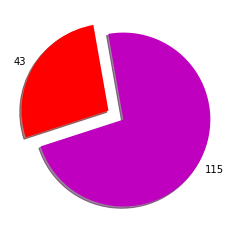




ANTES DO PRE-PROCESSAMENTO,TOTAL: 400


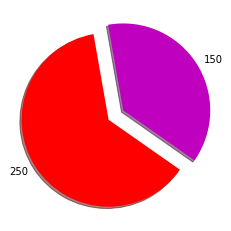

In [ ]:
import matplotlib.pyplot as plt



ckd = len(kidney[kidney.classe == 1])
notckd =len(kidney[kidney.classe == 0])

fatias = [ckd,notckd]
atividades = [ckd, notckd]
colunas = ['r', 'm']
# Criando um gráfico
plt.title( print("DEPOIS DO PRE-PROCESSAMENTO,TOTAL:",notckd+ckd));
plt.pie(fatias, labels = atividades, colors = colunas, startangle = 100, shadow = True, explode = (0.1, 0.1))
plt.show() 

print("\n\n")
#---------------------------------------------------------------------------------------------------------------
ckd = len(kidneytotal[kidneytotal.classe == 1])
notckd =len(kidneytotal[kidneytotal.classe == 0])


fatias = [ckd,notckd]
atividades = [ckd, notckd]
colunas = ['r', 'm']
# Criando um gráfico
plt.title( print("ANTES DO PRE-PROCESSAMENTO,TOTAL:",notckd+ckd));
plt.pie(fatias, labels = atividades, colors = colunas, startangle = 100, shadow = True, explode = (0.1, 0.1))
plt.show() 
# colocar o nome da classe no gráfico  de pizza.  e percentual

In [ ]:
from sklearn.model_selection import train_test_split
# ------ versão single 


kidney_X  = kidney.drop('classe', axis=1)
kidney_y =  kidney.classe

X_train, X_test, y_train, y_test = train_test_split(kidney_X, kidney_y, test_size=0.3,  random_state=1)

# ------------------------SVM---------------------------------------------
from sklearn import svm

svm = svm.SVC(kernel='linear')
svm = svm.fit(X_train, y_train)
print(f'A acurácia com SVM: {svm.score(X_test, y_test)}')

# ---------------------------Naive Bayes-----------------------------------------
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb = nb.fit(X_train, y_train)
print(f'A acurácia com Naive: {nb.score(X_test, y_test)}')

# --------------------------------------KNN--------------------------
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn = knn.fit(X_train, y_train)
print(f'A acurácia KNN: {knn.score(X_test, y_test)}')

#----------------------RandomForest-----------------------------------------
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(n_estimators = 100)
randomForest = randomForest.fit(X_train, y_train)
print(f'A acurácia RandomForest: {randomForest.score(X_test, y_test)}')


#--------------------- neural_network-------------------------------------------

from sklearn.neural_network import MLPClassifier

neural_network = MLPClassifier(verbose = True, max_iter=11, tol=0.10000,  solver = 'adam', hidden_layer_sizes=(250))  
neural_network = neural_network.fit(X_train, y_train)
print(f'A acurácia neural_network: {neural_network.score(X_test, y_test)}')

A acurácia com SVM: 1.0
A acurácia com Naive: 1.0
A acurácia KNN: 0.7916666666666666
A acurácia RandomForest: 0.9791666666666666
Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = inf
Iteration 5, loss = inf
Iteration 6, loss = 23.48660517
Iteration 7, loss = 66.09566816
Iteration 8, loss = inf
Iteration 9, loss = inf
Iteration 10, loss = inf
Iteration 11, loss = inf
A acurácia neural_network: 0.7291666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (11) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# ***Redução de dimensionalidade( PCA, FAMD) ***
*** PCA (Principal Component Analisys)***  






[ 46.2  54.1  60.2  65.1  69.5  73.5  77.1  80.1  83.   85.5  87.6  89.4
  90.9  92.4  93.7  94.9  95.9  96.8  97.5  98.2  98.8  99.3  99.7 100. ]
(158, 24)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,classe
0,5.727301,-3.535096,-2.087180,1.274524,0.369044,-1.030442,-1.184711,1.843214,0.483474,3.035417,-0.476336,0.094839,-1.005331,0.369988,-0.159390,0.351715,1.981946,0.152712,0.319777,0.112670,0.022857,0.415893,-0.282644,0.102650,0.0
1,6.205816,-3.283717,-0.549969,0.986694,-1.855131,0.284097,0.951985,2.445017,-1.226105,0.748525,-0.036339,-1.153213,0.379477,-1.103219,0.230752,-1.142542,-0.525308,0.709790,-1.072751,-1.433231,0.238232,-1.172350,0.492844,-0.625053,0.0
2,6.080082,1.198901,-1.737803,0.254880,-1.007705,0.869851,-2.784427,2.150497,-1.468028,1.395459,-2.584277,-0.204737,1.602035,-0.295248,-0.484447,0.814229,0.418345,-0.215409,-0.331789,0.162124,0.025094,1.370615,-0.780664,0.122524,0.0
3,8.373242,1.555314,-1.523739,1.958542,1.867052,-2.177961,0.000361,-0.817853,0.398081,-0.219706,-1.445101,-1.763485,-1.022068,0.577601,-0.738275,0.182115,-1.716776,0.382099,1.194984,-0.048945,0.105915,-0.467549,-0.053110,-0.035079,1.0
4,7.044920,-0.523491,0.380513,-0.527606,-2.094220,-0.202753,-1.153577,0.754600,-0.156090,-2.141417,-0.655706,-1.552787,-2.386835,0.125264,-0.924911,-1.203898,0.157861,-1.412556,-0.348706,-0.115669,-0.295273,0.391996,-0.355758,1.055998,0.0


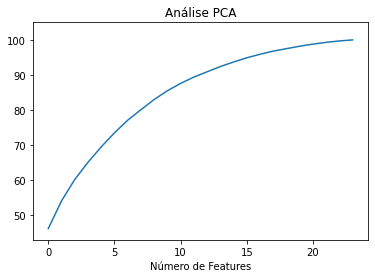

In [ ]:
#PCA

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import numpy as np


y = kidney.classe
X = kidney.drop('classe', axis=1)


ss = StandardScaler()
X_std = pd.DataFrame(ss.fit_transform(X),columns = X.columns)
X_std.head()


n_features = X_std.shape[1]

covar_matrix = PCA(n_components = n_features)

covar_matrix.fit(X_std)
variance = covar_matrix.explained_variance_ratio_ # Taxa de variância calculada
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
#var # Soma cumulativa de variância explicada com o número de features
print(var)
plt.xlabel('Número de Features')
plt.title('Análise PCA')
plt.ylim(43,105)
plt.style.context('seaborn-whitegrid')
plt.plot(var)


kidney_pca = covar_matrix.fit_transform(X_std)
kidney_pca = pd.DataFrame(data=kidney_pca)
print(kidney_pca.shape)


kidney_pca['classe'] = y


#pd.options.display.max_rows = 10000

import numpy as np
#kidney_pca1 = kidney_pca.replace(np.nan, 0, regex=True)
kidney_pca1.head()



**Acurácia** depois do PCA



In [ ]:

from sklearn.model_selection import train_test_split
# ------ versão single 


kidney_X  = kidney_pca1.drop('classe', axis=1)
kidney_y =  kidney_pca1.classe

X_train, X_test, y_train, y_test = train_test_split(kidney_X, kidney_y, test_size=0.3,  random_state=1)

# ------------------------SVM---------------------------------------------
from sklearn import svm

svm = svm.SVC(kernel='linear')
svm = svm.fit(X_train, y_train)
print(f'A acurácia com SVM: {svm.score(X_test, y_test)}')

# ---------------------------Naive Bayes-----------------------------------------
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb = nb.fit(X_train, y_train)
print(f'A acurácia com Naive: {nb.score(X_test, y_test)}')

# ----------------------------KNN-----------------------------------------------
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn = knn.fit(X_train, y_train)
print(f'A acurácia KNN: {knn.score(X_test, y_test)}')

#----------------------RandomForest---------------------------------------------
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(n_estimators = 100)
randomForest = randomForest.fit(X_train, y_train)
print(f'A acurácia RandomForest: {randomForest.score(X_test, y_test)}')


#--------------------- neural_network-------------------------------------------

from sklearn.neural_network import MLPClassifier

neural_network = MLPClassifier(verbose = True, max_iter=10, tol=0.1000,  solver = 'adam', hidden_layer_sizes=(250))  
neural_network = neural_network.fit(X_train, y_train)
neural =neural_network.score(X_test, y_test)
print(f'A acurácia neural_network:',neural)

A acurácia com SVM: 0.7916666666666666
A acurácia com Naive: 0.5208333333333334
A acurácia KNN: 0.8541666666666666
A acurácia RandomForest: 0.875
Iteration 1, loss = 0.78346271
Iteration 2, loss = 0.74980077
Iteration 3, loss = 0.71808980
Iteration 4, loss = 0.68834383
Iteration 5, loss = 0.66054811
Iteration 6, loss = 0.63469525
Iteration 7, loss = 0.61072297
Iteration 8, loss = 0.58855404
Iteration 9, loss = 0.56809168
Iteration 10, loss = 0.54922906
A acurácia neural_network: 0.75


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# **Redução de dimensionalidade**
**FAMD (Factor Analysis of Mixed Data)**


[ 4.   5.8  7.5  9.1 10.7 12.2 13.7 15.1 16.5 17.8 19.1 20.4 21.7 23.
 24.2 25.4 26.6 27.8 28.9 30.  31.1 32.1 33.1 34.1]
(158, 24)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,classe
3,2.477706,1.590145,1.170371,0.220730,0.564107,1.856299,-0.781736,2.173291,-0.448675,-1.624607,-2.308005,-2.298877,-0.239373,0.448915,4.194590,-0.950365,-0.517787,-0.664643,-1.914321,-1.167704,-0.807796,1.401756,-0.100468,-0.823424,1
9,2.889552,1.358663,-0.688401,-0.829351,-0.838788,-0.023847,-0.964440,-1.121919,1.716170,-1.938710,2.300885,-0.798210,0.869365,-0.738152,0.714551,0.293859,1.125462,-0.065817,-0.980211,1.759782,-0.492726,0.121591,-1.355433,2.399308,1
11,3.065615,0.204014,-1.392642,-0.470708,1.600726,0.387072,-1.624202,-0.761903,2.820948,0.936843,-2.508051,-0.820629,0.906845,0.425026,1.001349,-0.036665,-0.964857,-1.178213,-2.027087,-0.517353,-0.635443,0.192037,-0.094060,-2.866206,1
14,3.921893,-3.232523,0.470830,5.990793,2.266921,-2.181064,-3.422851,1.612982,-1.307873,-0.365418,1.326884,1.555937,1.786084,2.169129,-1.197125,-0.436868,-0.349930,-0.005861,-0.568467,-0.208431,-1.602198,-0.584125,-1.002413,0.945594,1
20,3.199368,-0.473906,-0.296002,-1.651854,-0.676668,-0.876536,-0.132849,-0.509985,-2.217725,0.015622,0.865751,1.045066,2.897020,-2.164492,1.329878,-0.660789,0.448897,-1.846428,0.619414,-2.390131,2.665091,-2.924414,-1.337631,-1.672690,1


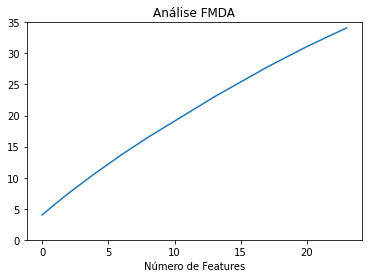

In [ ]:
#!pip install prince

from prince import FAMD


X  = kidney.drop('classe', axis=1)
y =  kidney.classe


famd = FAMD(n_components = n_features, n_iter = 3, random_state = 1)
famd.fit(X)
kidney_famd = famd.transform(X)
n_features = X.shape[1] # Temos 24 features

var_famd=np.cumsum(np.round(famd.explained_inertia_, decimals=3)*100)
print(var_famd)

plt.xlabel('Número de Features')
plt.title('Análise FMDA')
plt.ylim(0,35)
plt.style.context('seaborn-whitegrid')
plt.plot(var_famd)

famd = FAMD(n_components = 24, n_iter = 10, random_state = 101)
famd.fit(X)
kidney_famd = famd.transform(X)
kidney_famd = pd.DataFrame(data=kidney_famd)
print(kidney_famd.shape)
kidney_famd['classe'] = y
kidney_famd.head()

In [ ]:
from sklearn.model_selection import train_test_split
# ------ versão single 


kidney_X  = kidney_famd.drop('classe', axis=1)
kidney_y =  kidney_famd.classe

X_train, X_test, y_train, y_test = train_test_split(kidney_X, kidney_y, test_size=0.3,  random_state=1)

# ------------------------SVM---------------------------------------------
from sklearn import svm

svm = svm.SVC(kernel='linear')
svm = svm.fit(X_train, y_train)
print(f'A acurácia com SVM: {svm.score(X_test, y_test)}')

# ---------------------------Naive Bayes-----------------------------------------
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb = nb.fit(X_train, y_train)
print(f'A acurácia com Naive: {nb.score(X_test, y_test)}')

# --------------------------------------KNN--------------------------
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)
print(f'A acurácia KNN: {knn.score(X_test, y_test)}')

#----------------------RandomForest-----------------------------------------
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(n_estimators = 100)
randomForest = randomForest.fit(X_train, y_train)
print(f'A acurácia RandomForest: {randomForest.score(X_test, y_test)}')


#--------------------- neural_network-------------------------------------------

from sklearn.neural_network import MLPClassifier

neural_network = MLPClassifier(verbose = True, max_iter=11, tol=0.10000,  solver = 'adam', hidden_layer_sizes=(250))  
neural_network = neural_network.fit(X_train, y_train)
neural= neural_network.score(X_test, y_test)
print(f'A acurácia neural_network:',neural)

A acurácia com SVM: 0.9791666666666666
A acurácia com Naive: 0.9791666666666666
A acurácia KNN: 0.8125
A acurácia RandomForest: 1.0
Iteration 1, loss = 0.74816729
Iteration 2, loss = 0.72347112
Iteration 3, loss = 0.69984708
Iteration 4, loss = 0.67726895
Iteration 5, loss = 0.65568563
Iteration 6, loss = 0.63508810
Iteration 7, loss = 0.61539835
Iteration 8, loss = 0.59653986
Iteration 9, loss = 0.57844955
Iteration 10, loss = 0.56110501
Iteration 11, loss = 0.54444619
A acurácia neural_network: 0.8125


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (11) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
